# UTM Conversion Analysis

This notebook analyzes synthetic marketing data from CRM and web tracking systems to understand which UTM sources drive the most effective user conversions.

## Dataset Sources:
- `crm_data.csv`: contains user IDs and their lead status (Converted, Prospect, Lost)
- `web_tracking.csv`: contains user web sessions, time spent, and UTM source

## Goals:
- Identify top UTM sources by:
  - Unique users
  - Total session time
  - Conversion rate
- Visualize the relationship between session time and conversion rate
- Prepare summary insights and a visual dashboard


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load CSV files of CRM and web activities to dataframes
df_crm = pd.read_csv('crm_data.csv')
df_web = pd.read_csv('web_tracking.csv')

In [3]:
# Display the first few rows of the CRM dataset
df_crm.head()

,user_id,lead_status,company,sign_up_date,industry,country
0,137,Converted,Company_0,2024-03-09,Healthcare,US
1,163,Converted,Company_1,2024-03-01,Finance,UK
2,103,Prospect,Company_2,2024-03-02,Healthcare,France
3,163,Lost,Company_3,2024-03-01,SaaS,US
4,171,Lost,Company_4,2024-03-07,Healthcare,Germany


In [4]:
# Display the number of rows and columns in the CRM dataset
print(f"Number of rows in CRM dataset is {df_crm.shape[0]} and number of columns is {df_crm.shape[1]}")

Number of rows in CRM dataset is 60 and number of columns is 6


`user_id` - Unique user ID

`lead_status` - Lead Status: `Converted`, `Prospect`, `Lost`

`company` - Company name

`sign_up_date` - Date of registration

`industry` - Company industry

`country` - Country

In [5]:
# Display the first few rows of the web dataset
df_web.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type
0,151,s000,2024-03-07 12:55:00,/pricing,54,newsletter,referral,mobile
1,192,s001,2024-03-05 14:21:00,/landing,71,linkedin,email,desktop
2,114,s002,2024-03-01 14:25:00,/contact,143,facebook,cpc,desktop
3,171,s003,2024-03-06 16:56:00,/contact,293,newsletter,email,desktop
4,160,s004,2024-03-01 21:41:00,/contact,37,linkedin,organic,tablet


In [6]:
# Display the number of rows and columns in web datasets
print(f"Number of rows in web dataset is {df_web.shape[0]} and number of columns is {df_web.shape[1]}")

Number of rows in web dataset is 100 and number of columns is 8


`user_id` - Unique user ID

`session_id` - Session ID

`timestamp` - Date and time of visit

`page` - Visited page

`time_spent_sec` - Time spent on the page

`utm_source` - Marketing channel

`utm_medium` - Traffic type

`device_type`- Device type 

In [7]:
# Merge web and CRM tables by user_id
df_merged = df_web.merge(df_crm[['user_id', 'lead_status']], on='user_id', how='left')

In [8]:
# Display the first few rows of the merged dataset
df_merged.head()

,user_id,session_id,timestamp,page,time_spent_sec,utm_source,utm_medium,device_type,lead_status
0,151,s000,2024-03-07 12:55:00,/pricing,54,newsletter,referral,mobile,Converted
1,192,s001,2024-03-05 14:21:00,/landing,71,linkedin,email,desktop,Converted
2,114,s002,2024-03-01 14:25:00,/contact,143,facebook,cpc,desktop,Lost
3,171,s003,2024-03-06 16:56:00,/contact,293,newsletter,email,desktop,Lost
4,171,s003,2024-03-06 16:56:00,/contact,293,newsletter,email,desktop,Prospect


In [9]:
# Remove unnecessary columns that do not participate in the analysis
df = df_merged.drop(columns = ['timestamp', 'utm_medium', 'device_type', 'page'])

In [10]:
# Display the first few rows of the final dataset
df.head()

,user_id,session_id,time_spent_sec,utm_source,lead_status
0,151,s000,54,newsletter,Converted
1,192,s001,71,linkedin,Converted
2,114,s002,143,facebook,Lost
3,171,s003,293,newsletter,Lost
4,171,s003,293,newsletter,Prospect


In [11]:
# Display summary statistics for numeric features
df.describe()

,user_id,time_spent_sec
count,138.000000,138.000000
mean,148.746377,153.188406
std,28.793770,74.885952
min,101.000000,11.000000
25%,121.000000,108.000000
50%,155.500000,144.500000
75%,171.000000,212.000000
max,199.000000,295.000000


In [12]:
# Count missing values per column
df.isnull().sum()

user_id            0
session_id         0
time_spent_sec     0
utm_source         0
lead_status       21
dtype: int64

In [13]:
# Show all rows with at least one missing value
df[df.isna().any(axis=1)]

,user_id,session_id,time_spent_sec,utm_source,lead_status
8,182,s006,53,facebook,NaN
9,186,s007,295,google,NaN
21,101,s016,268,newsletter,NaN
24,129,s018,146,google,NaN
26,101,s020,234,google,NaN
33,175,s025,105,newsletter,NaN
38,148,s029,61,newsletter,NaN
44,179,s035,196,newsletter,NaN
72,172,s048,169,linkedin,NaN
80,113,s054,264,linkedin,NaN


In [14]:
# Replace missing values in the 'lead_status' column with the text 'Unknown'
df['lead_status'] = df['lead_status'].fillna('Unknown')

# Count how many missing values are left in each column
df.isnull().sum()

user_id           0
session_id        0
time_spent_sec    0
utm_source        0
lead_status       0
dtype: int64

In [15]:
# Show all rows that are completely duplicated (all values are the same)
df[df.duplicated()]

,user_id,session_id,time_spent_sec,utm_source,lead_status
48,161,s037,11,facebook,Converted
49,161,s037,11,facebook,Prospect
52,161,s038,139,facebook,Converted
53,161,s038,139,facebook,Prospect
58,161,s040,63,facebook,Converted
59,161,s040,63,facebook,Prospect
61,150,s041,233,linkedin,Prospect
68,150,s045,62,linkedin,Prospect
76,103,s051,212,facebook,Prospect
77,103,s051,212,facebook,Prospect


In [16]:
# Count the number of complete duplicates in the dataframe
print(df.duplicated().sum())

18


In [17]:
# Specify the priority of lead_status (the lower the number, the more important)
status_order = {'Converted': 0, 'Prospect': 1, 'Lost': 2}

# Convert lead_status to numeric priority
df['status_rank'] = df['lead_status'].map(status_order)

# Sort so that the rows with the best status come first
df = df.sort_values('status_rank')

# Remove duplicates by user_id + session_id, leaving the best status.
df = df.drop_duplicates(subset=['user_id', 'session_id'], keep='first')

# Delete the auxiliary column
df = df.drop(columns='status_rank')

# Count the number of complete duplicates in the dataframe
df.duplicated().sum()

0

In [18]:
# Display all rows of the dataset after cleaning
df

,user_id,session_id,time_spent_sec,utm_source,lead_status
0,151,s000,54,newsletter,Converted
47,161,s037,11,facebook,Converted
51,161,s038,139,facebook,Converted
54,146,s039,229,linkedin,Converted
57,161,s040,63,facebook,Converted
...,...,...,...,...,...
113,133,s082,263,newsletter,Unknown
120,113,s086,18,google,Unknown
127,186,s092,161,facebook,Unknown
132,139,s094,129,google,Unknown


In [19]:
# Count the number of unique users for each utm_source
utm_users = df.groupby('utm_source')['user_id'].nunique().sort_values(ascending=False)
utm_users.name = 'unique_users'
utm_users

utm_source
newsletter    26
google        25
facebook      17
linkedin      17
Name: unique_users, dtype: int64

In [20]:
# Calculate the total time spent on the site for each utm_source
utm_time = df.groupby('utm_source')['time_spent_sec'].sum().sort_values(ascending=False)
utm_time.name = 'total_time_spent'
utm_time

utm_source
newsletter    5038
google        4192
linkedin      3762
facebook      3383
Name: total_time_spent, dtype: int64

In [21]:
# Create a column where True - if the user converted
df['is_converted'] = df['lead_status'] == 'Converted'

# Count the number of conversions for each utm_source
converted_users = df.groupby('utm_source')['is_converted'].sum().sort_values(ascending=False)

# Remove the temporary column
df = df.drop(columns='is_converted')
converted_users

utm_source
google        13
newsletter    12
linkedin      11
facebook       8
Name: is_converted, dtype: int64

In [22]:
# Calculate the conversion percentage for each utm_source
conversion_rate = round(100 * converted_users / utm_users, 2)
conversion_rate.name = 'conversion_rate_%'
conversion_rate

utm_source
facebook      47.06
google        52.00
linkedin      64.71
newsletter    46.15
Name: conversion_rate_%, dtype: float64

In [23]:
# Combine all metrics into one final DataFrame
top_performing_utm = pd.concat([utm_users, utm_time, conversion_rate], axis=1)

In [24]:
# Show summary table with analytics by utm_source
top_performing_utm = top_performing_utm.sort_values('conversion_rate_%')
top_performing_utm

,unique_users,total_time_spent,conversion_rate_%
utm_source,,,
newsletter,26,5038,46.15
facebook,17,3383,47.06
google,25,4192,52.00
linkedin,17,3762,64.71


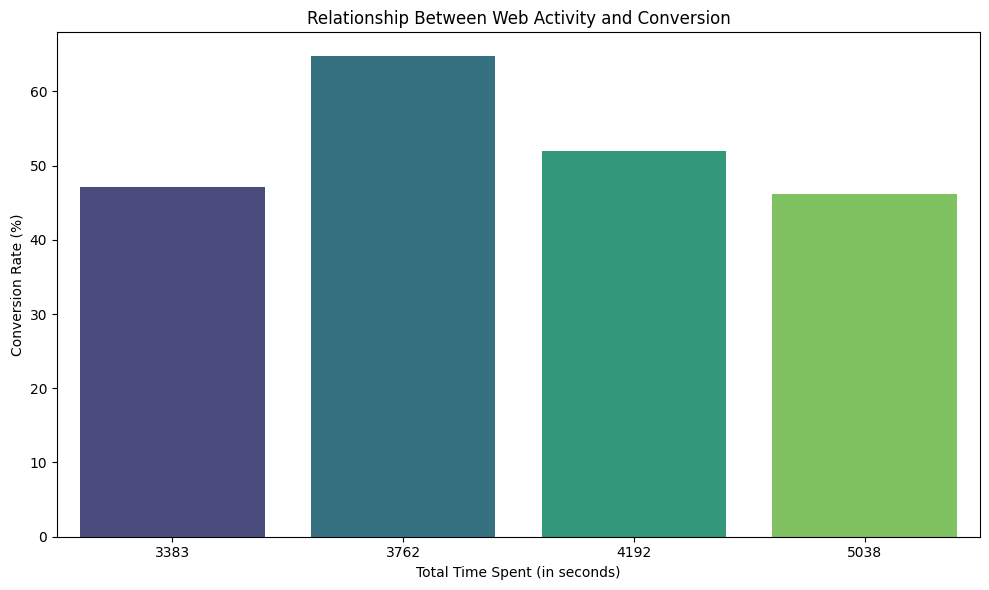

In [25]:
# Plotting the relationship between time on site and conversions
plt.figure(figsize=(10, 6))

# Horizontal barplot
sns.barplot(
    data=top_performing_utm,
    x='total_time_spent',
    y='conversion_rate_%',
    palette='viridis'
)

plt.title('Relationship Between Web Activity and Conversion')
plt.xlabel('Total Time Spent (in seconds)')
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

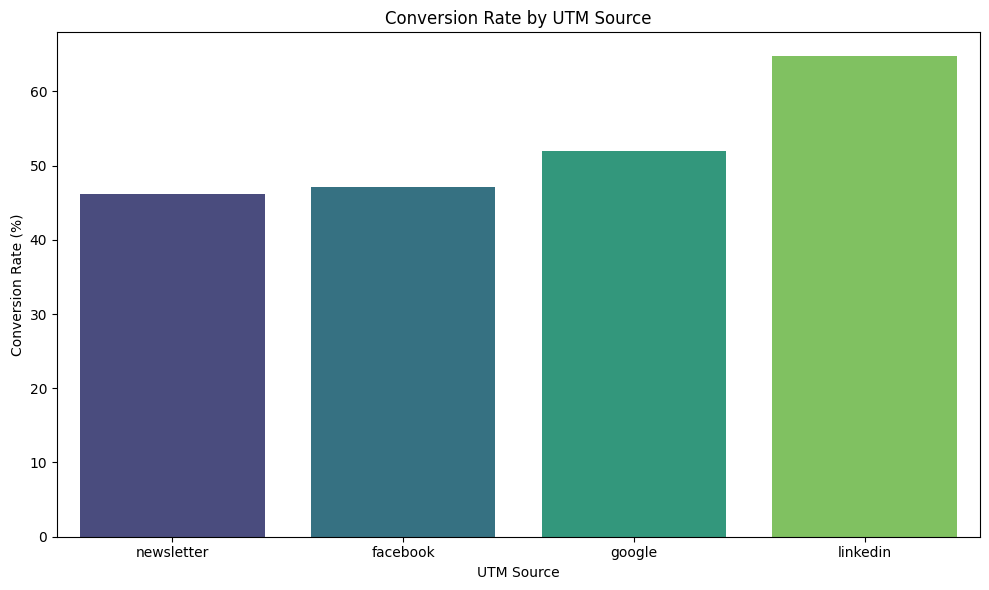

In [26]:
# Plotting the relationship between UTM source and conversions
plt.figure(figsize=(10, 6))

# Horizontal barplot
sns.barplot(
    data=top_performing_utm.sort_values('conversion_rate_%').reset_index(),
    x='utm_source',
    y='conversion_rate_%',
    palette='viridis'
)

plt.title('Conversion Rate by UTM Source')
plt.xlabel('UTM Source')
plt.ylabel('Conversion Rate (%)')
plt.tight_layout()
plt.show()

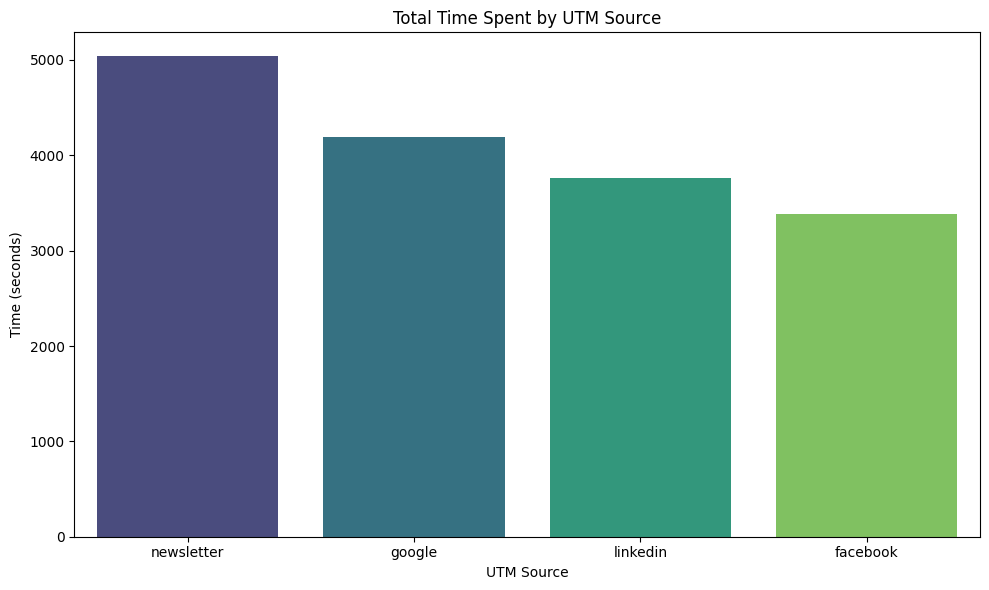

In [27]:
# Plotting the relationship between UTM source and conversions
plt.figure(figsize=(10, 6))

sns.barplot(
    data=top_performing_utm.sort_values('total_time_spent', ascending=False).reset_index(),
    x='utm_source',
    y='total_time_spent',
    palette='viridis'
)
plt.title('Total Time Spent by UTM Source')
plt.ylabel('Time (seconds)')
plt.xlabel('UTM Source')
plt.tight_layout()
plt.show()